## Dados da Vitivinicultura



Sua área é recém-criada dentro da empresa, e você será responsável
pelos relatórios iniciais a serem apresentados em uma reunião de investidores e
acionistas, explicando a quantidade de vinhos exportados e os fatores externos
que podem vir a surgir e que interferem nas análises:
1. Dados climáticos.
2. Dados demográficos.
3. Dados econômicos.
4. Dados de avaliações de vinhos.

O Head de Dados pediu para que você construísse uma tabela contendo
as seguintes informações:

*   País de origem (Brasil).
*   País de destino.
*   Quantidade em litros de vinho exportado (utilize: 1KG =1L).
*   Valor em US$


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker


In [ ]:
dfExportacao = pd.read_csv('/content/Tech Challenge - 01 - dfExportacao.csv')

In [ ]:
# Ajuste da visualização dos dados tipo float
pd.options.display.float_format = '{:.1f}'.format

### **PARTE I**

#### Construção da tabela solicitada pelo Head

---



Informações solicitadas:

*   País de origem (Brasil).
*   País de destino.
*   Quantidade em litros de vinho exportado (utilize: 1KG =1L).
*   Valor em US$

In [ ]:
print(dfExportacao.dtypes)

dfExportacao.head()

Países             object
Quantidade (Kg)    object
Valor (US$)        object
Ano                 int64
Produto            object
dtype: object


,Países,Quantidade (Kg),Valor (US$),Ano,Produto
0,Afeganistão,-,-,2008,Vinho de mesa
1,África do Sul,-,-,2008,Vinho de mesa
2,"Alemanha, República Democrática",265.742,429.970,2008,Vinho de mesa
3,Angola,25.721,71.083,2008,Vinho de mesa
4,Anguilla,-,-,2008,Vinho de mesa


In [ ]:
# Renomeando as colunas
dfExportacao = dfExportacao.rename(columns = {'Países':'Pais_Destino','Quantidade (Kg)':'Qnt','Valor (US$)':'Valor'})

#Transformacao os tipos das colunas
dfExportacao['Qnt'] = dfExportacao['Qnt'].str.replace('-', '0')
dfExportacao['Qnt'] = dfExportacao['Qnt'].str.replace('.', '')
dfExportacao['Valor'] = dfExportacao['Valor'].str.replace('-', '0')
dfExportacao['Valor'] = dfExportacao['Valor'].str.replace('.', '')

dfExportacao

,Pais_Destino,Qnt,Valor,Ano,Produto
0,Afeganistão,0,0,2008,Vinho de mesa
1,África do Sul,0,0,2008,Vinho de mesa
2,"Alemanha, República Democrática",265742,429970,2008,Vinho de mesa
3,Angola,25721,71083,2008,Vinho de mesa
4,Anguilla,0,0,2008,Vinho de mesa
...,...,...,...,...,...
2328,Tuvalu,0,0,2024,Vinho de mesa
2329,Uruguai,36729,62325,2024,Vinho de mesa
2330,Vanuatu,0,0,2024,Vinho de mesa
2331,Venezuela,122922,199418,2024,Vinho de mesa


In [ ]:
#Conversao do tipo
dfExportacao['Qnt'] = dfExportacao['Qnt'].astype(float)
dfExportacao['Valor'] = dfExportacao['Valor'].astype(float)

print(dfExportacao.dtypes)

dfExportacao

Pais_Destino     object
Qnt             float64
Valor           float64
Ano               int64
Produto          object
dtype: object


,Pais_Destino,Qnt,Valor,Ano,Produto
0,Afeganistão,0.0,0.0,2008,Vinho de mesa
1,África do Sul,0.0,0.0,2008,Vinho de mesa
2,"Alemanha, República Democrática",265742.0,429970.0,2008,Vinho de mesa
3,Angola,25721.0,71083.0,2008,Vinho de mesa
4,Anguilla,0.0,0.0,2008,Vinho de mesa
...,...,...,...,...,...
2328,Tuvalu,0.0,0.0,2024,Vinho de mesa
2329,Uruguai,36729.0,62325.0,2024,Vinho de mesa
2330,Vanuatu,0.0,0.0,2024,Vinho de mesa
2331,Venezuela,122922.0,199418.0,2024,Vinho de mesa


In [ ]:
#Criando a coluna de Pais de origem
dfExportacao['Pais_Origem'] = 'Brasil'

#Removendo as linhas nulas
dfExportacao = dfExportacao[(dfExportacao['Qnt'] > 0) & (dfExportacao['Valor'] > 0)]

#Agrupando as informacoes
dfHead = dfExportacao.groupby(['Pais_Origem', 'Pais_Destino'])[['Qnt', 'Valor']].sum()


#Tabela final
dfHead = dfHead.reset_index()
dfHead

,Pais_Origem,Pais_Destino,Qnt,Valor
0,Brasil,Afeganistão,11.0,46.0
1,Brasil,"Alemanha, República Democrática",920523.0,2626342.0
2,Brasil,Angola,168868.0,576189.0
3,Brasil,Antilhas Holandesas,97002.0,142915.0
4,Brasil,Antígua e Barbuda,2934.0,12915.0
...,...,...,...,...
126,Brasil,Vanuatu,18.0,31.0
127,Brasil,Venezuela,319467.0,508758.0
128,Brasil,Vietnã,9887.0,13182.0
129,Brasil,África do Sul,250.0,2597.0


### **PARTE II**

#### Analise da produção e venda de vinhos

---

Objetivo:
Analise a situação dos montante de venda de exportação nos últimos 15
anos, separando a análise por país e trazendo quais as prospecções futuras e
possíveis ações para uma melhoria nas exportações


In [ ]:
len(dfExportacao['Pais_Destino'].unique().tolist())

131

Entre 2008 a 2024, o Brasil exportou para 131 paises diferentes

In [ ]:
dfPaisDestino = dfExportacao.groupby('Ano')['Pais_Destino'].count().reset_index()
dfvalor = dfExportacao.groupby('Ano')['Valor'].sum().reset_index()
dfQnt = dfExportacao.groupby('Ano')['Qnt'].sum().reset_index()


#Trazendo a coluna de media para a tabela agrupada
dfAno = dfPaisDestino.merge(dfvalor, left_on='Ano', right_on='Ano', how='left')
dfAno = dfAno.merge(dfQnt, left_on='Ano', right_on='Ano', how='left')

dfAno

,Ano,Pais_Destino,Valor,Qnt
0,2008,41,7118100.0,10346323.0
1,2009,39,8940988.0,25514198.0
2,2010,33,2595303.0,1280574.0
3,2011,41,3615120.0,1214834.0
4,2012,40,5521293.0,5775376.0
5,2013,36,22744845.0,9149059.0
6,2014,38,7472795.0,2324029.0
7,2015,30,2769160.0,1198479.0
8,2016,33,4434704.0,1786549.0
9,2017,34,7135607.0,2889572.0


In [ ]:
dfExportacao = dfExportacao[dfExportacao['Ano']>2008]

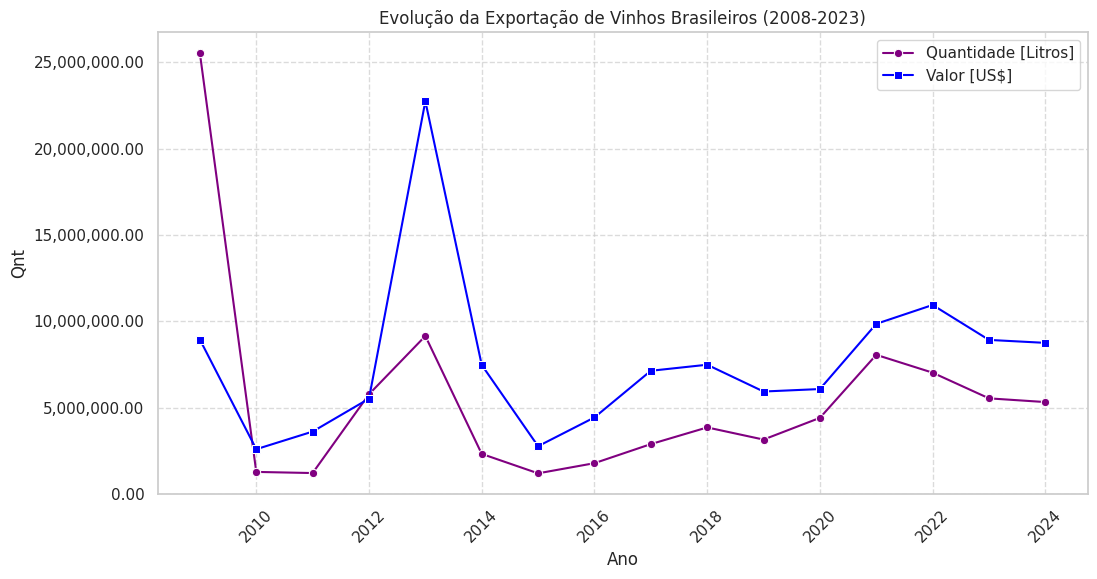

In [ ]:
dfExportacaoAno = dfExportacao.groupby(['Ano'])[['Qnt','Valor']].sum()

# Criando o gráfico
plt.figure(figsize=(12, 6))

sns.lineplot(data=dfExportacaoAno, x=dfExportacaoAno.index, y='Qnt', color='purple', marker='o', label='Quantidade [Litros]')
sns.lineplot(data=dfExportacaoAno, x=dfExportacaoAno.index, y='Valor', color='blue', marker='s', label='Valor [US$]')

# Tickets
# plt.xlabel("")
# plt.ylabel("")
plt.title("Evolução da Exportação de Vinhos Brasileiros (2008-2023)")
plt.grid(linestyle='--', alpha=0.7)
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.xticks(rotation=45)
plt.legend()

plt.show()

Ao observar as curvas de quantidade e valor, é possivel notar uma tendencia de crescimento para a exportação de vinhos. Alem disso, notamos um pico de vendas em 2013.



In [ ]:
df2013 = dfExportacao[dfExportacao['Ano']==2013]
df2013 = df2013.groupby('Pais_Destino')[['Qnt','Valor']].sum().reset_index()
df2013 = df2013.sort_values(by = 'Valor', ascending = False)
df2013['Representatividade'] = df2013['Valor']/df2013['Valor'].sum() * 100

df2013.head(10)

,Pais_Destino,Qnt,Valor,Representatividade
30,Rússia,5893291.0,14795694.0,65.1
12,Espanha,1972980.0,3748940.0,16.5
13,Estados Unidos,245368.0,786556.0,3.5
24,Paraguai,481564.0,680828.0,3.0
19,Japão,91988.0,429088.0,1.9
29,Reino Unido,59161.0,305005.0,1.3
14,Finlândia,36682.0,283114.0,1.2
8,China,40929.0,279956.0,1.2
0,"Alemanha, República Democrática",61699.0,265978.0,1.2
25,Países Baixos,57792.0,255690.0,1.1


Em 2013, é possível notar um pico de vendas, atingindo um valor de 22.744.845,00. Nesse ano, a Rússia realizou uma importação de 5.893.291 litros de vinho, totalizando uma compra de 14.795.694,00, representando 65,1% das vendas nesse ano.


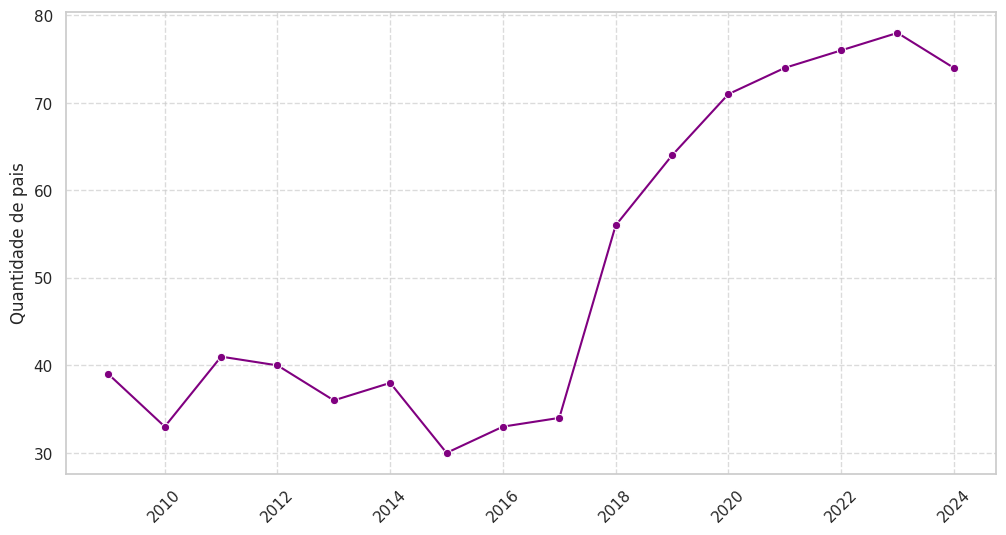

In [ ]:
dfExportacaoAnoMercado = dfExportacao.groupby(['Ano'])['Pais_Destino'].count().reset_index()

# Criando o gráfico
plt.figure(figsize=(12, 6))

sns.lineplot(data=dfExportacaoAnoMercado, x='Ano', y='Pais_Destino', color='purple', marker='o')

# Tickets
plt.xlabel("")
plt.ylabel("Quantidade de pais")
# plt.title("Evolução da quantidade de paises que importaram Vinhos Brasileiros (2008-2024)")
plt.grid(linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

Além do crescimento na quantidade de exportação e vendas, é possivel notar o crescimento no número de países que importam o vinho do Brasil. Dando um destaque para o periodo de 2018 em diante

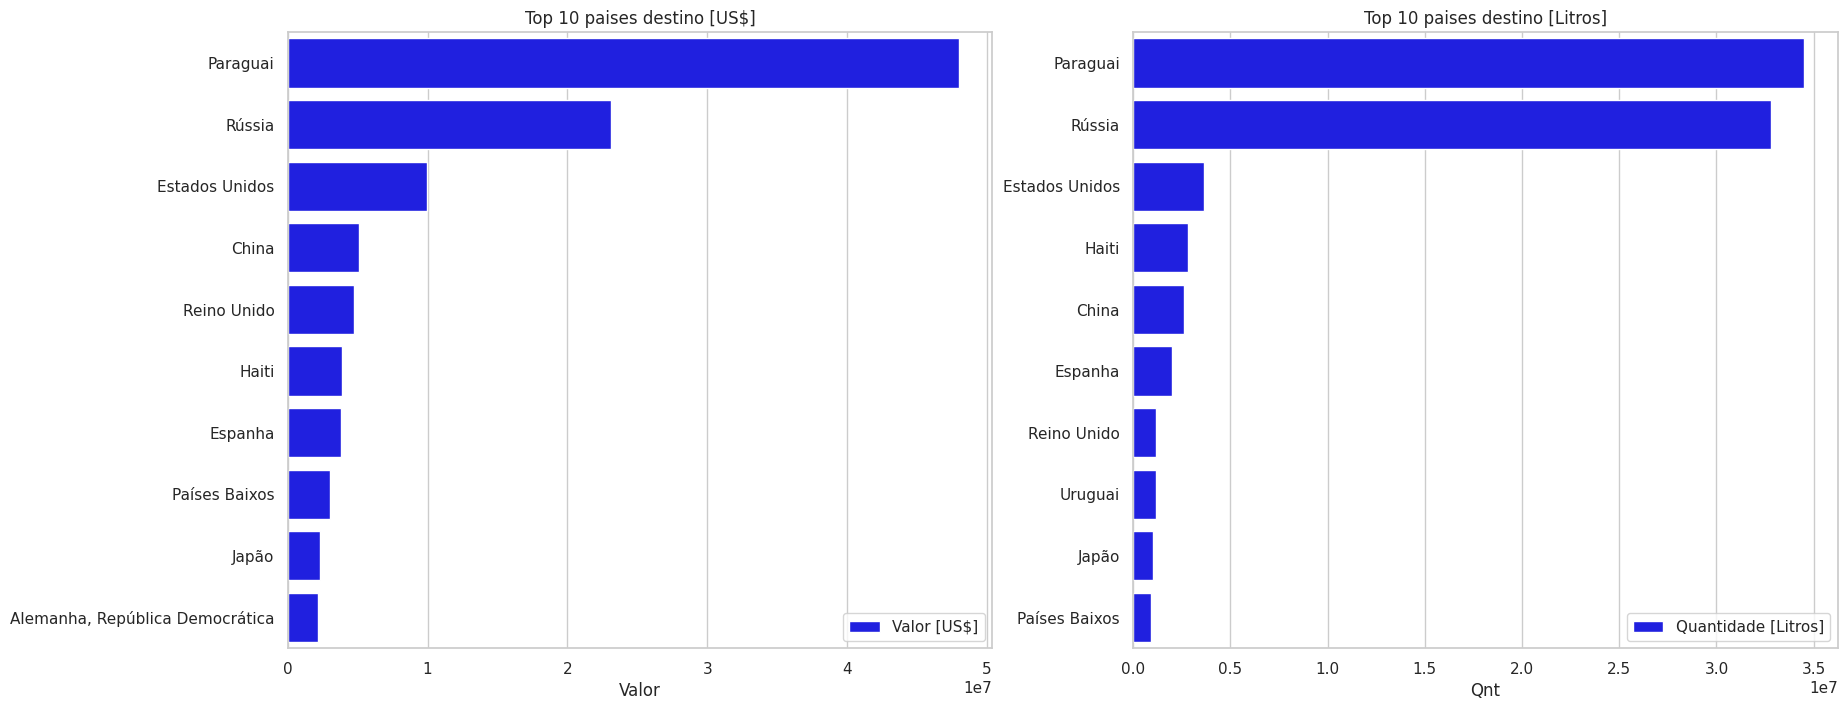

In [ ]:
#Agrupamento por qnt
dfExportacaoPais = dfExportacao.groupby(['Pais_Destino'])[['Qnt','Valor']].sum().reset_index()

dfExportacaoPaisQnt = dfExportacaoPais.sort_values(by='Qnt', ascending=False)

dfExportacaoPaisValor = dfExportacaoPais.sort_values(by='Valor', ascending=False)


fig, axs = plt.subplots(1, 2, figsize=(20, 8))  # 1 linha, 2 colunas

sns.barplot(data=dfExportacaoPaisValor.head(10), x= 'Valor', y= 'Pais_Destino', color = 'blue', label='Valor [US$]', ax=axs[0])
axs[0].set_title('Top 10 paises destino [US$]')
axs[0].set_ylabel('')

sns.barplot(data=dfExportacaoPaisQnt.head(10), x= 'Qnt', y= 'Pais_Destino', color = 'blue', label='Quantidade [Litros]', ax=axs[1])
axs[1].set_title('Top 10 paises destino [Litros]')
axs[1].set_ylabel('')

plt.show()

In [ ]:
#Calculo da representatividade
QntTotal = dfExportacaoPaisQnt['Qnt'].sum()
dfExportacaoPaisQnt['Qnt Representatividade [%]'] = (dfExportacaoPaisQnt['Qnt']/QntTotal) * 100
dfExportacaoPaisQnt = dfExportacaoPaisQnt.sort_values(by = 'Qnt', ascending = False)

dfExportacaoPaisQnt = dfExportacaoPaisQnt[['Pais_Destino','Qnt','Qnt Representatividade [%]']]
dfExportacaoPaisQnt.head(5)

,Pais_Destino,Qnt,Qnt Representatividade [%]
94,Paraguai,34508515.0,39.0
102,Rússia,32822197.0,37.1
46,Estados Unidos,3659709.0,4.1
61,Haiti,2801918.0,3.2
28,China,2608917.0,2.9


In [ ]:
#Calculo da representatividade
ValorTotal = dfExportacao['Valor'].sum()
dfExportacaoPaisValor['Valor Representatividade [%]'] = (dfExportacaoPaisValor['Valor']/ValorTotal) * 100
dfExportacaoPaisValor = dfExportacaoPaisValor.sort_values(by = 'Valor', ascending = False)

dfExportacaoPaisValor = dfExportacaoPaisValor[['Pais_Destino','Valor','Valor Representatividade [%]']]
dfExportacaoPaisValor.head(5)

,Pais_Destino,Valor,Valor Representatividade [%]
94,Paraguai,47984063.0,38.9
102,Rússia,23152054.0,18.8
46,Estados Unidos,9957775.0,8.1
28,China,5086290.0,4.1
101,Reino Unido,4747648.0,3.9


In [ ]:
dfExportacaoPaisValor = dfExportacaoPaisValor.merge(dfExportacaoPaisQnt, left_on='Pais_Destino', right_on='Pais_Destino', how='left')

dfExportacaoPaisValor = dfExportacaoPaisValor.sort_values(by = 'Valor Representatividade [%]', ascending = False)

dfExportacaoPaisValor.head(2)

,Pais_Destino,Valor,Valor Representatividade [%],Qnt,Qnt Representatividade [%]
0,Paraguai,47984063.0,38.9,34508515.0,39.0
1,Rússia,23152054.0,18.8,32822197.0,37.1


Entre 2007 a 2023, apenas dois paises representaram  **76,6%** do volume de exportação: **Rússia (39,5%) e Paraguai (37,1%)**. Entrentanto, os mesmos representaram apenas **57,5%** do valor de vendas: **Rússia (19,6%) e Paraguai (37,9%)**.

#### Analise da vendas anuais da Russia e Paraguai

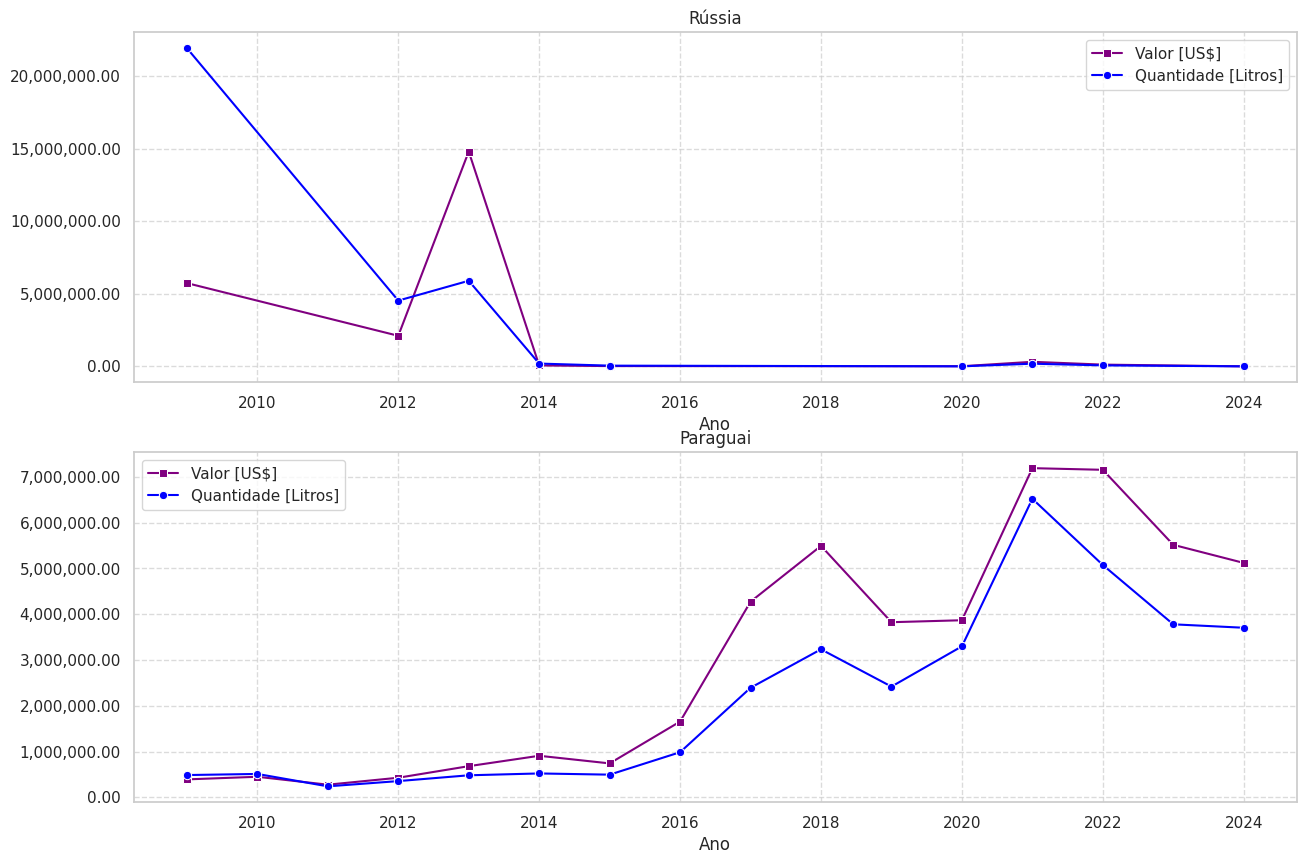

In [ ]:
# Filtro para selecionar somente Rússia e o Paraguai
dfRussia_Paraguai = dfExportacao[(dfExportacao['Pais_Destino'] == 'Rússia') | (dfExportacao['Pais_Destino'] == 'Paraguai') ]

dfRussia_Paraguai = dfRussia_Paraguai.groupby(['Ano','Pais_Destino'])[['Qnt','Valor']].sum().reset_index()

fig, axs = plt.subplots(2, 1, figsize=(15, 10))  # 1 linha, 2 colunas

sns.lineplot(data = dfRussia_Paraguai[dfRussia_Paraguai['Pais_Destino'] == 'Rússia'], x='Ano',y='Valor', ax = axs[0], color = 'Purple',label='Valor [US$]',marker='s')
sns.lineplot(data = dfRussia_Paraguai[dfRussia_Paraguai['Pais_Destino'] == 'Rússia'], x='Ano',y='Qnt', ax = axs[0], color = 'Blue',label='Quantidade [Litros]',marker='o')
axs[0].set_title('Rússia')
axs[0].set_ylabel('')
axs[0].grid(linestyle ='--', alpha = 0.7)
axs[0].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

sns.lineplot(data = dfRussia_Paraguai[dfRussia_Paraguai['Pais_Destino'] == 'Paraguai'], x='Ano',y='Valor', ax = axs[1], color = 'Purple',label='Valor [US$]',marker='s')
sns.lineplot(data = dfRussia_Paraguai[dfRussia_Paraguai['Pais_Destino'] == 'Paraguai'], x='Ano',y='Qnt', ax = axs[1], color = 'Blue',label='Quantidade [Litros]',marker='o')
axs[1].set_title('Paraguai')
axs[1].set_ylabel('')
axs[1].grid(linestyle ='--', alpha = 0.7)
axs[1].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

plt.show()

In [ ]:
dfRussia = dfRussia_Paraguai[dfRussia_Paraguai['Pais_Destino'] == 'Rússia']

dfRussia = dfRussia.groupby(['Ano'])[['Qnt','Valor']].sum().reset_index()

dfRussia = dfRussia.sort_values(by = 'Ano', ascending = True)

dfRussia

,Ano,Qnt,Valor
0,2009,21912914.0,5732280.0
1,2012,4528176.0,2103968.0
2,2013,5893291.0,14795694.0
3,2014,190656.0,61440.0
4,2015,47664.0,18240.0
5,2020,1463.0,8550.0
6,2021,181931.0,312926.0
7,2022,66046.0,118618.0
8,2024,56.0,338.0


Ao observar os graficos, é possivel notar que apesar da Rússia teve uma queda nas importações de vinho apartir do periodo de 2013.

Durante esse periodo, é possivel notar que a Russia passou a produzir uvas no proprio terriotoria, diminuindo a dependencia da importação de terceiros:

https://www.ivv.gov.pt/np4/695/%7B$clientServletPath%7D/?newsId=8300&fileName=Ficha_Mercado_Russia_2017_vs2.pdf

Em contrapartida, o Paraguia apresenta-se como um pais que começou a importar apartir do periodo de 2016.

#### Analisando as bases sem a Rússia e o Paraguai

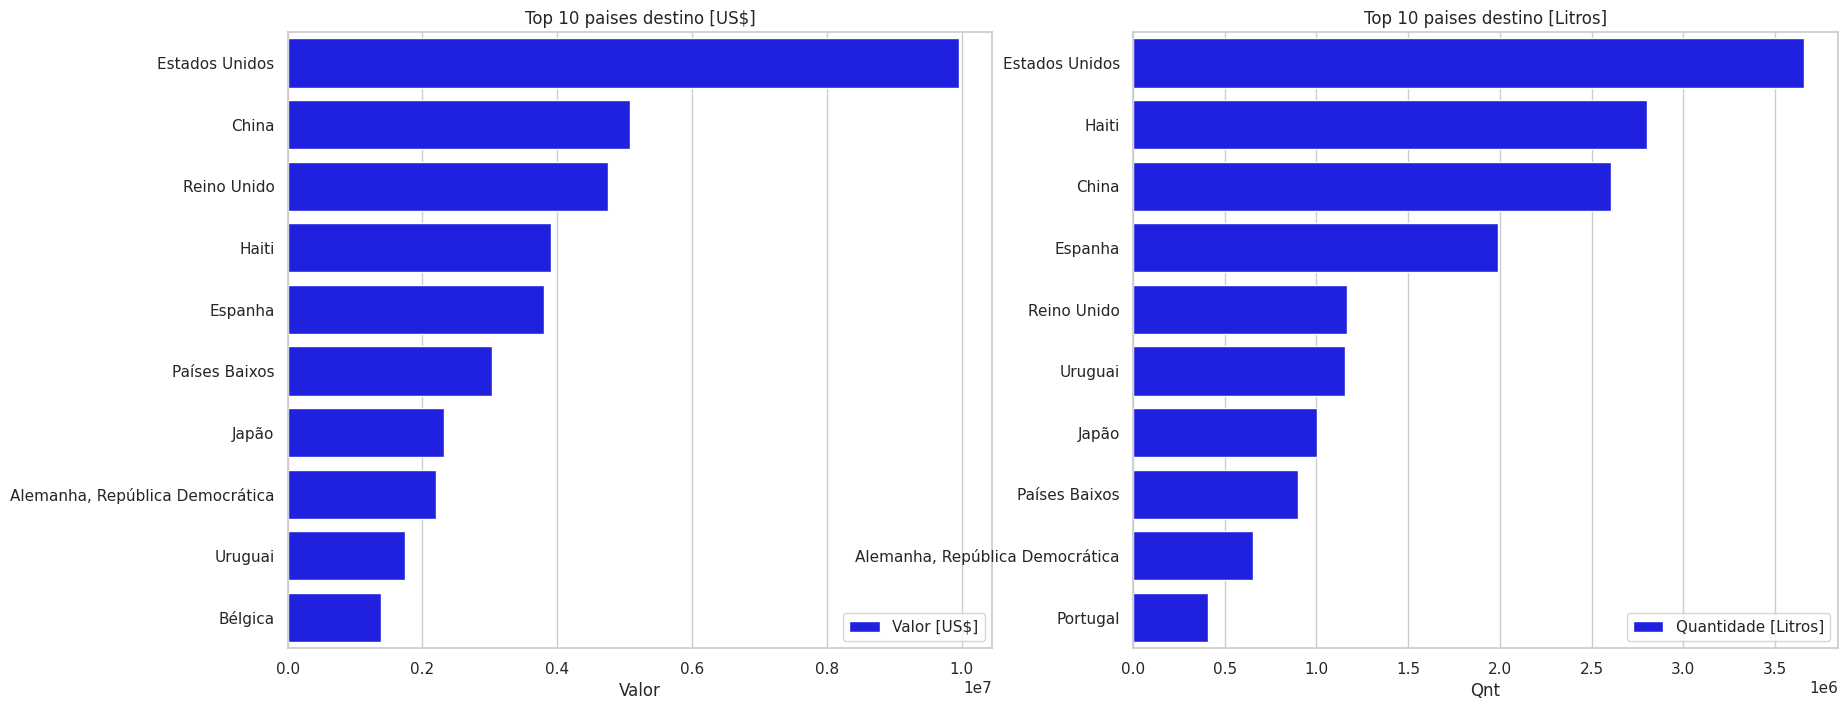

In [ ]:
#Agrupamento por qnt
dfExportacaoPais = dfExportacao.groupby(['Pais_Destino'])[['Qnt','Valor']].sum().reset_index()

dfExportacaoPais = dfExportacaoPais[(dfExportacaoPais['Pais_Destino'] != 'Rússia') & (dfExportacaoPais['Pais_Destino'] != 'Paraguai')]

dfExportacaoPaisQnt = dfExportacaoPais.sort_values(by='Qnt', ascending=False)

dfExportacaoPaisValor = dfExportacaoPais.sort_values(by='Valor', ascending=False)


fig, axs = plt.subplots(1, 2, figsize=(20, 8))  # 1 linha, 2 colunas

sns.barplot(data=dfExportacaoPaisValor.head(10), x= 'Valor', y= 'Pais_Destino', color = 'blue', label='Valor [US$]', ax=axs[0])
axs[0].set_title('Top 10 paises destino [US$]')
axs[0].set_ylabel('')

sns.barplot(data=dfExportacaoPaisQnt.head(10), x= 'Qnt', y= 'Pais_Destino', color = 'blue', label='Quantidade [Litros]', ax=axs[1])
axs[1].set_title('Top 10 paises destino [Litros]')
axs[1].set_ylabel('')

plt.show()

In [ ]:
#Calculo da representatividade
QntTotal = dfExportacaoPaisQnt['Qnt'].sum()
dfExportacaoPaisQnt['Representatividade [%]'] = (dfExportacaoPaisQnt['Qnt']/QntTotal) * 100
dfExportacaoPaisQnt = dfExportacaoPaisQnt.sort_values(by = 'Qnt', ascending = False)

dfExportacaoPaisQnt = dfExportacaoPaisQnt[['Pais_Destino','Qnt','Representatividade [%]']]
dfExportacaoPaisQnt.head(5)

,Pais_Destino,Qnt,Representatividade [%]
46,Estados Unidos,3659709.0,17.3
61,Haiti,2801918.0,13.2
28,China,2608917.0,12.3
45,Espanha,1990429.0,9.4
101,Reino Unido,1165560.0,5.5


In [ ]:
#Calculo da representatividade
QntTotal = dfExportacao['Valor'].sum()
dfExportacaoPaisValor['Representatividade [%]'] = (dfExportacaoPaisValor['Valor']/QntTotal) * 100
dfExportacaoPaisValor = dfExportacaoPaisValor.sort_values(by = 'Valor', ascending = False)

dfExportacaoPaisValor = dfExportacaoPaisValor[['Pais_Destino','Valor','Representatividade [%]']]
dfExportacaoPaisValor.head(5)

,Pais_Destino,Valor,Representatividade [%]
46,Estados Unidos,9957775.0,8.1
28,China,5086290.0,4.1
101,Reino Unido,4747648.0,3.9
61,Haiti,3912007.0,3.2
45,Espanha,3807951.0,3.1


#### Analise por ano

In [ ]:
#Calculando os top 10 paises que mais exportaram nos ultimos 5 anos
dfExportacaoAnoPaisQnt = dfExportacao[(dfExportacao['Ano'] >= 2019) & (dfExportacao['Ano'] <= 2024) & (dfExportacao['Pais_Destino'] != 'Rússia') & (dfExportacao['Pais_Destino'] != 'Paraguai')]

dfExportacaoAnoPaisQnt = dfExportacaoAnoPaisQnt.groupby(['Ano','Pais_Destino'])[['Qnt']].sum().reset_index()

# Somando a quantidade total exportada por país no período
top_paises_qnt = dfExportacaoAnoPaisQnt.groupby('Pais_Destino')['Qnt'].sum().nlargest(6).index

# Filtrando apenas os top 5 países
dfExportacaoAnoPaisQnt = dfExportacaoAnoPaisQnt[dfExportacaoAnoPaisQnt['Pais_Destino'].isin(top_paises_qnt)]

print(top_paises_qnt)
dfExportacaoAnoPaisQnt.head(5)

Index(['Haiti', 'Estados Unidos', 'Uruguai', 'China', 'Venezuela', 'Japão'], dtype='object', name='Pais_Destino')


,Ano,Pais_Destino,Qnt
12,2019,China,129852.0
22,2019,Estados Unidos,209765.0
30,2019,Haiti,81873.0
35,2019,Japão,40621.0
60,2019,Uruguai,6180.0


In [ ]:
#Calculando os top 10 paises que mais exportaram nos ultimos 5 anos
dfExportacaoAnoPaisValor = dfExportacao[(dfExportacao['Pais_Destino'] != 'Rússia') & (dfExportacao['Pais_Destino'] != 'Paraguai')]

dfExportacaoAnoPaisValor = dfExportacaoAnoPaisValor.groupby(['Ano','Pais_Destino'])[['Valor']].sum().reset_index()

# Somando a quantidade total exportada por país no período
dfExportacaoAnoPaisValor = dfExportacaoAnoPaisValor.sort_values(by = 'Valor', ascending = False)
top_paises_valor = dfExportacaoAnoPaisValor.groupby('Pais_Destino')['Valor'].sum().nlargest(10).index

# Filtrando apenas os top 10 países
dfExportacaoAnoPaisValor = dfExportacaoAnoPaisValor[dfExportacaoAnoPaisValor['Pais_Destino'].isin(top_paises_valor)]

print(top_paises_valor)
dfExportacaoAnoPaisValor.head(10)

Index(['Estados Unidos', 'China', 'Reino Unido', 'Haiti', 'Espanha',
       'Países Baixos', 'Japão', 'Alemanha, República Democrática', 'Uruguai',
       'Bélgica'],
      dtype='object', name='Pais_Destino')


,Ano,Pais_Destino,Valor
159,2013,Espanha,3748940.0
292,2017,Estados Unidos,1523699.0
209,2014,Reino Unido,1373747.0
87,2011,Estados Unidos,1030254.0
639,2022,Uruguai,997367.0
676,2023,Haiti,871661.0
530,2021,Haiti,831181.0
160,2013,Estados Unidos,786556.0
206,2014,Países Baixos,773767.0
181,2014,"Alemanha, República Democrática",761653.0


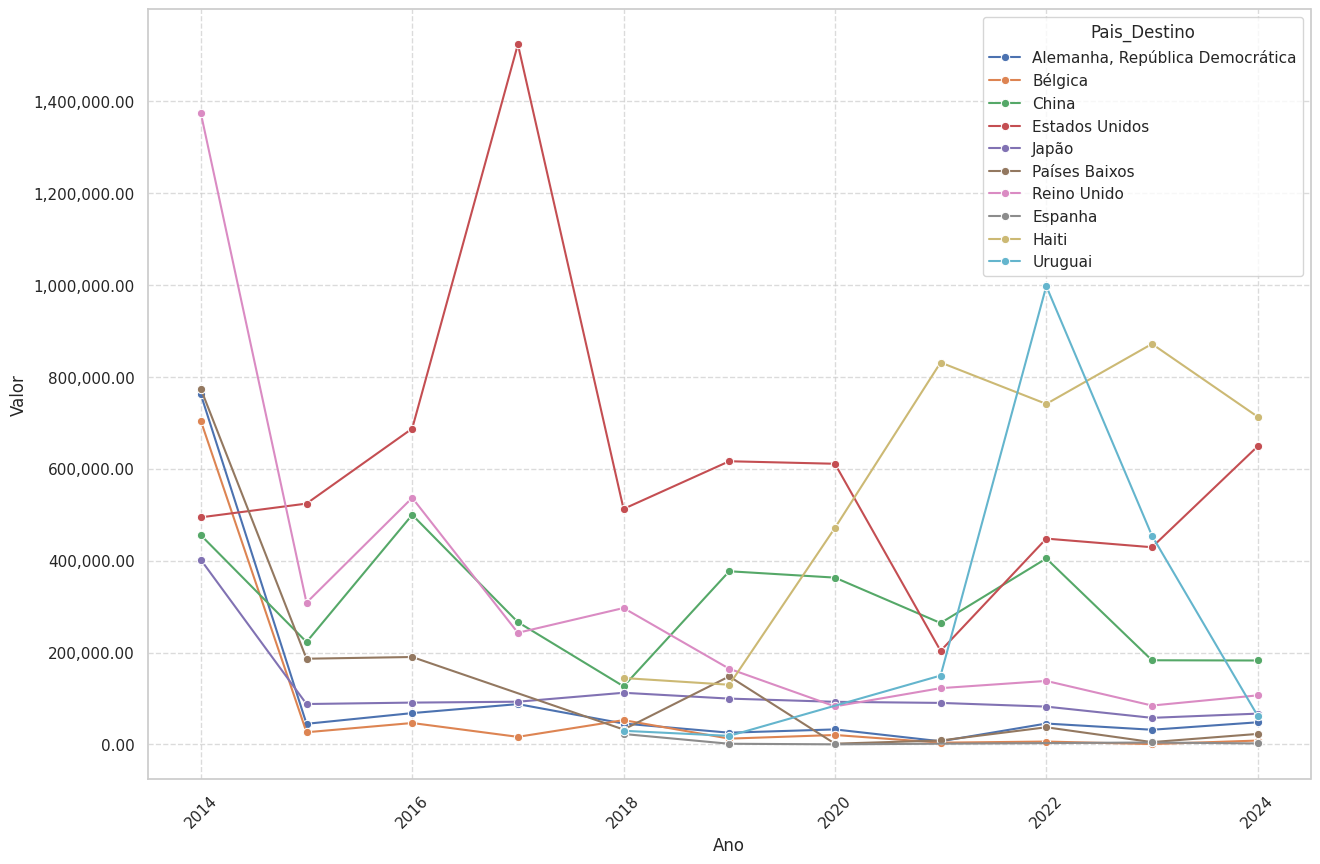

In [ ]:
dfExportacaoAnoPaisValor = dfExportacao[dfExportacao['Pais_Destino'].isin(top_paises_valor)]
dfExportacaoAnoPaisValor = dfExportacaoAnoPaisValor[(dfExportacaoAnoPaisValor['Ano'] >= 2014) ]

# Criando o gráfico
plt.figure(figsize = (15, 10))
sns.lineplot(data = dfExportacaoAnoPaisValor, x ='Ano',y='Valor',hue = 'Pais_Destino',marker ='o')


# Tickets
# plt.xlabel("Ano")
# plt.ylabel("Quantidade de pais")
# --plt.title("Evolução da quantidade de paises que importaram Vinhos Brasileiros (2008-2024)")
plt.grid(linestyle='--', alpha=0.7)
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.xticks(rotation=45)
plt.show()

In [ ]:
dftop_10 = dfExportacao[(dfExportacao['Pais_Destino'] != 'Rússia') & (dfExportacao['Pais_Destino'] != 'Paraguai')]

dftop_10 = dftop_10.groupby('Pais_Destino')['Valor'].sum().reset_index()
dftop_10['Representatividade'] = (dftop_10['Valor']/dftop_10['Valor'].sum()) * 100

dftop_10 = dftop_10.sort_values(by = 'Valor', ascending = False)

dftop_10['Representatividade_Acumulada'] = dftop_10['Representatividade'].cumsum()


dftop_10.head(10)

,Pais_Destino,Valor,Representatividade,Representatividade_Acumulada
46,Estados Unidos,9957775.0,19.1,19.1
28,China,5086290.0,9.8,28.9
100,Reino Unido,4747648.0,9.1,38.0
61,Haiti,3912007.0,7.5,45.5
45,Espanha,3807951.0,7.3,52.8
94,Países Baixos,3035719.0,5.8,58.7
71,Japão,2324119.0,4.5,63.1
1,"Alemanha, República Democrática",2196372.0,4.2,67.4
120,Uruguai,1736474.0,3.3,70.7
20,Bélgica,1391274.0,2.7,73.4


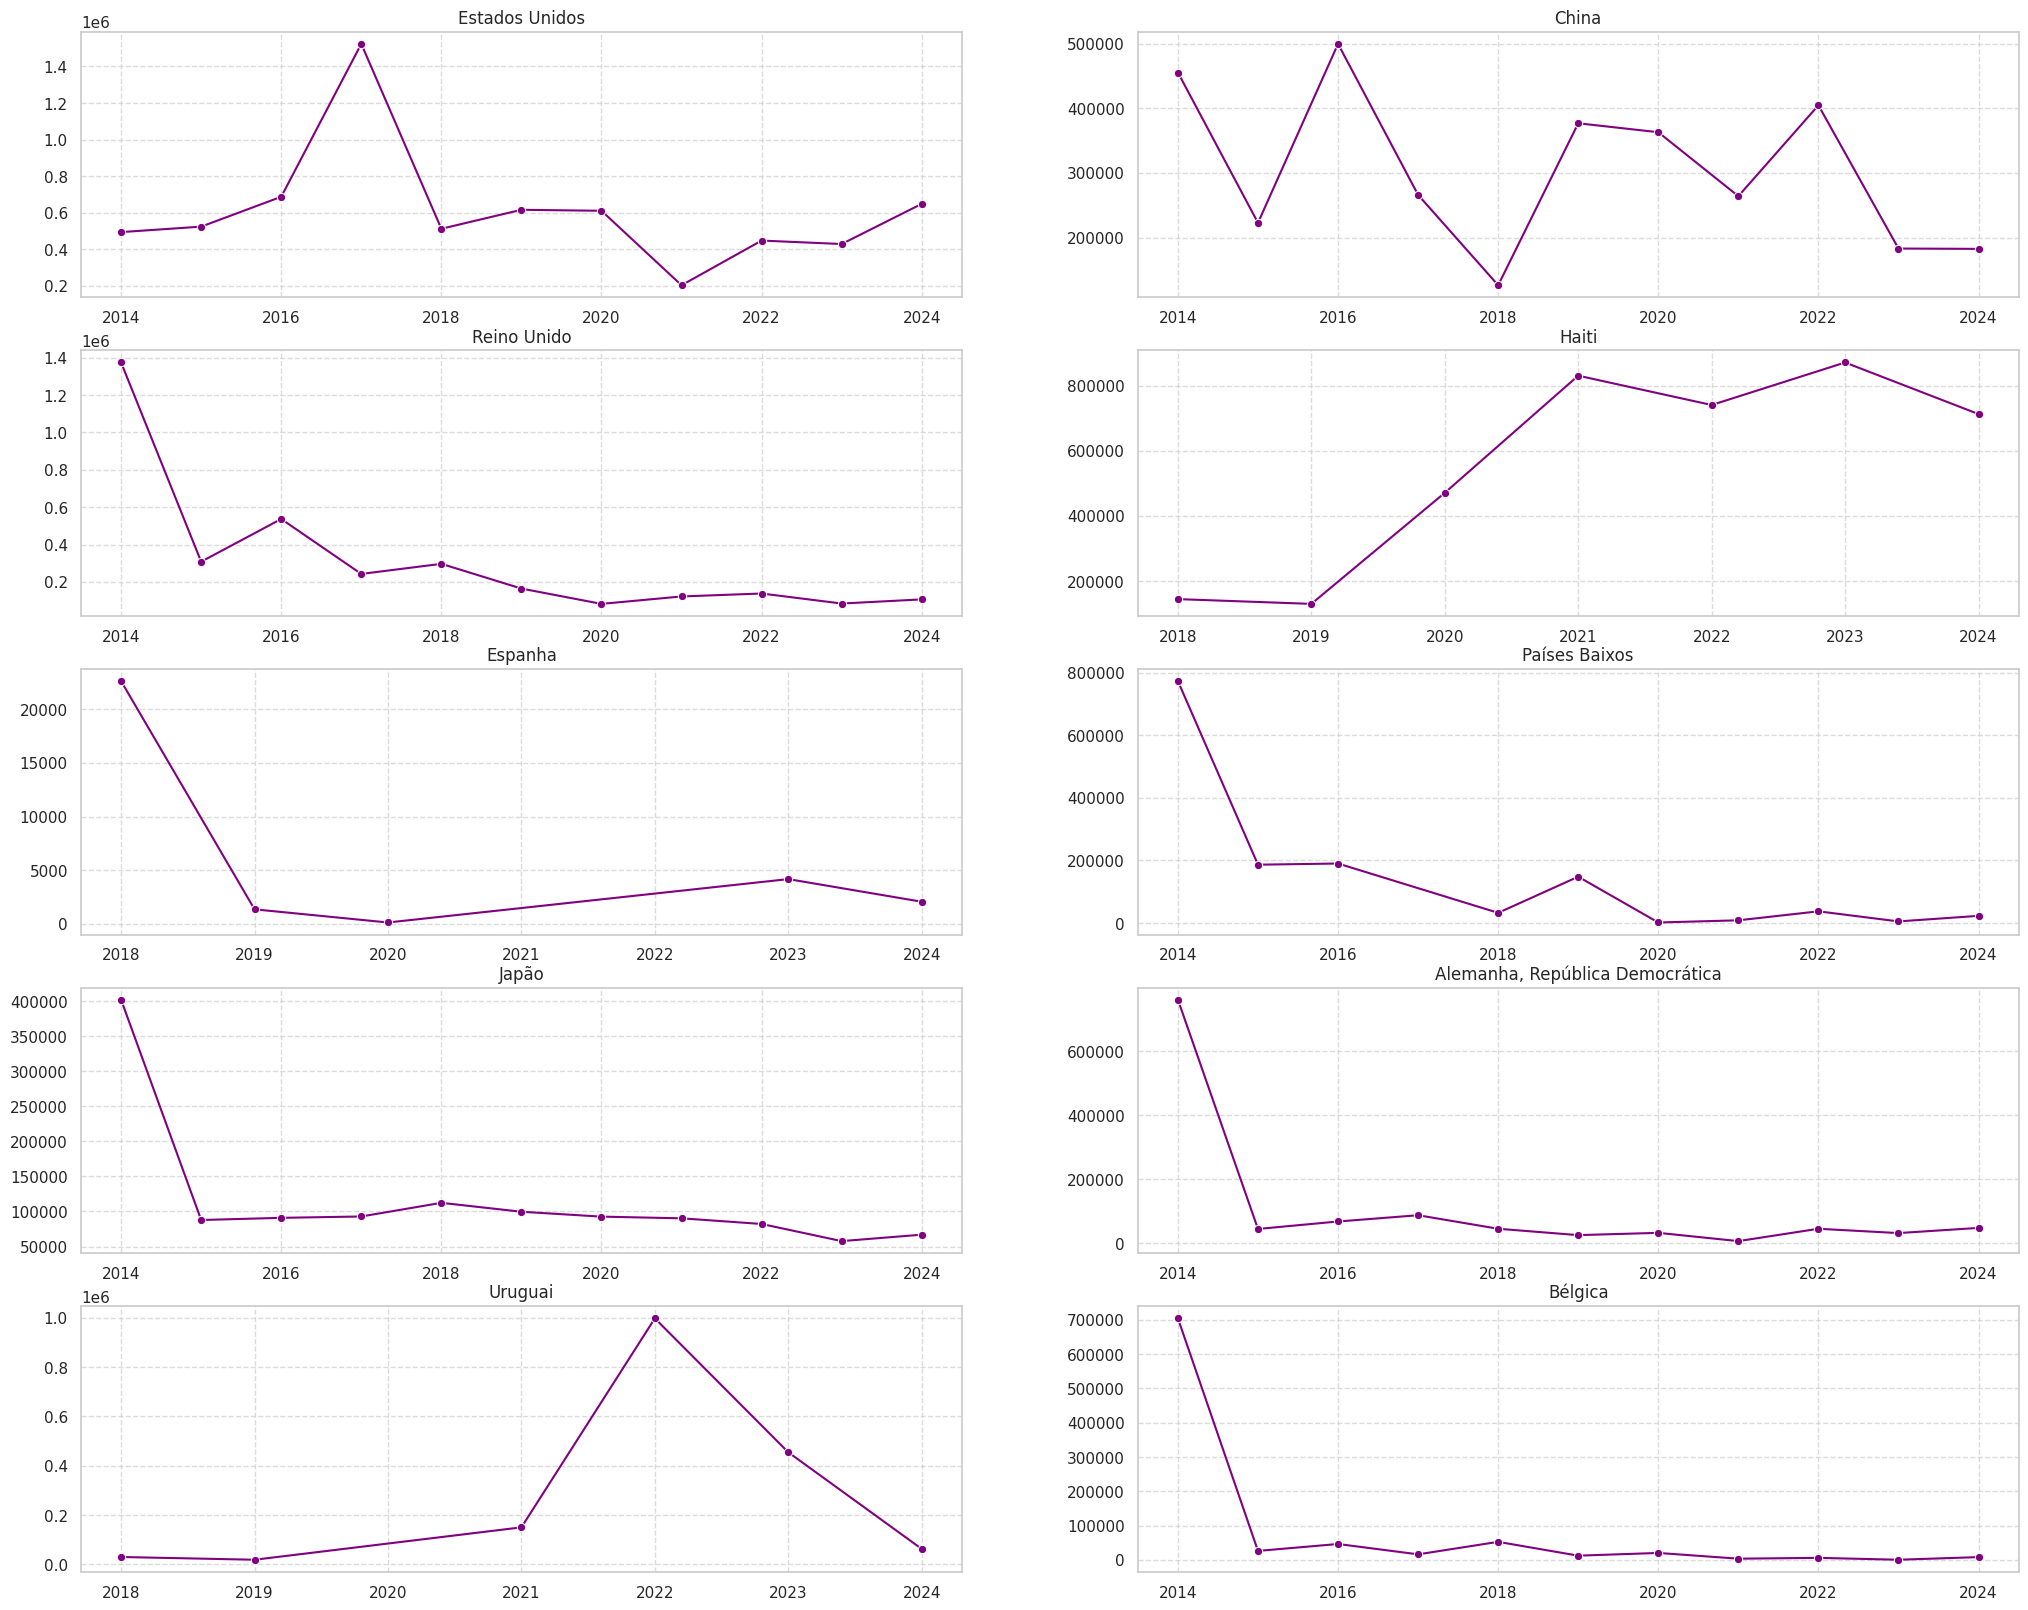

In [ ]:
# Criando figura e eixos
fig, axs = plt.subplots(5,2, figsize=(25, 20))
axs = axs.flatten()  # Transforma em lista para facilitar iteração

# Gráficos de Quantidade por país
for i, pais in enumerate(top_paises_valor):

    sns.lineplot(data=dfExportacaoAnoPaisValor[dfExportacaoAnoPaisValor['Pais_Destino'] == pais],
                 x='Ano', y='Valor', marker='o', ax=axs[i], color = 'purple')

    # sns.lineplot(data=dfExportacaoAnoPaisValor[dfExportacaoAnoPaisValor['Pais_Destino'] == pais],
    #              x='Ano', y='Qnt', marker='o', ax=axs[i], color = 'Blue')

    axs[i].set_title(f"{pais}")
    axs[i].grid(linestyle='--', alpha=0.7)
    axs[i].set_ylabel('')
    axs[i].set_xlabel('')

plt.show()

Ao observar os top 10, temos a seguintes tendecias:

- Paises com tendencia ao aumento de importações: Haiti, Venezuela, Curaçao, Nigéria e Hong Kong
- Paises com tendencia estabilidade: Uruguai, China, Reino Unido e Japão
- Paises com tendencia na diminuição no numero de importação: Estados Unidos

Dessa forma, temos que 6 dos paises que mais importaram no ultimos 5 anos apresentam uma tendencia a aumentar o numero de importações de vinho.


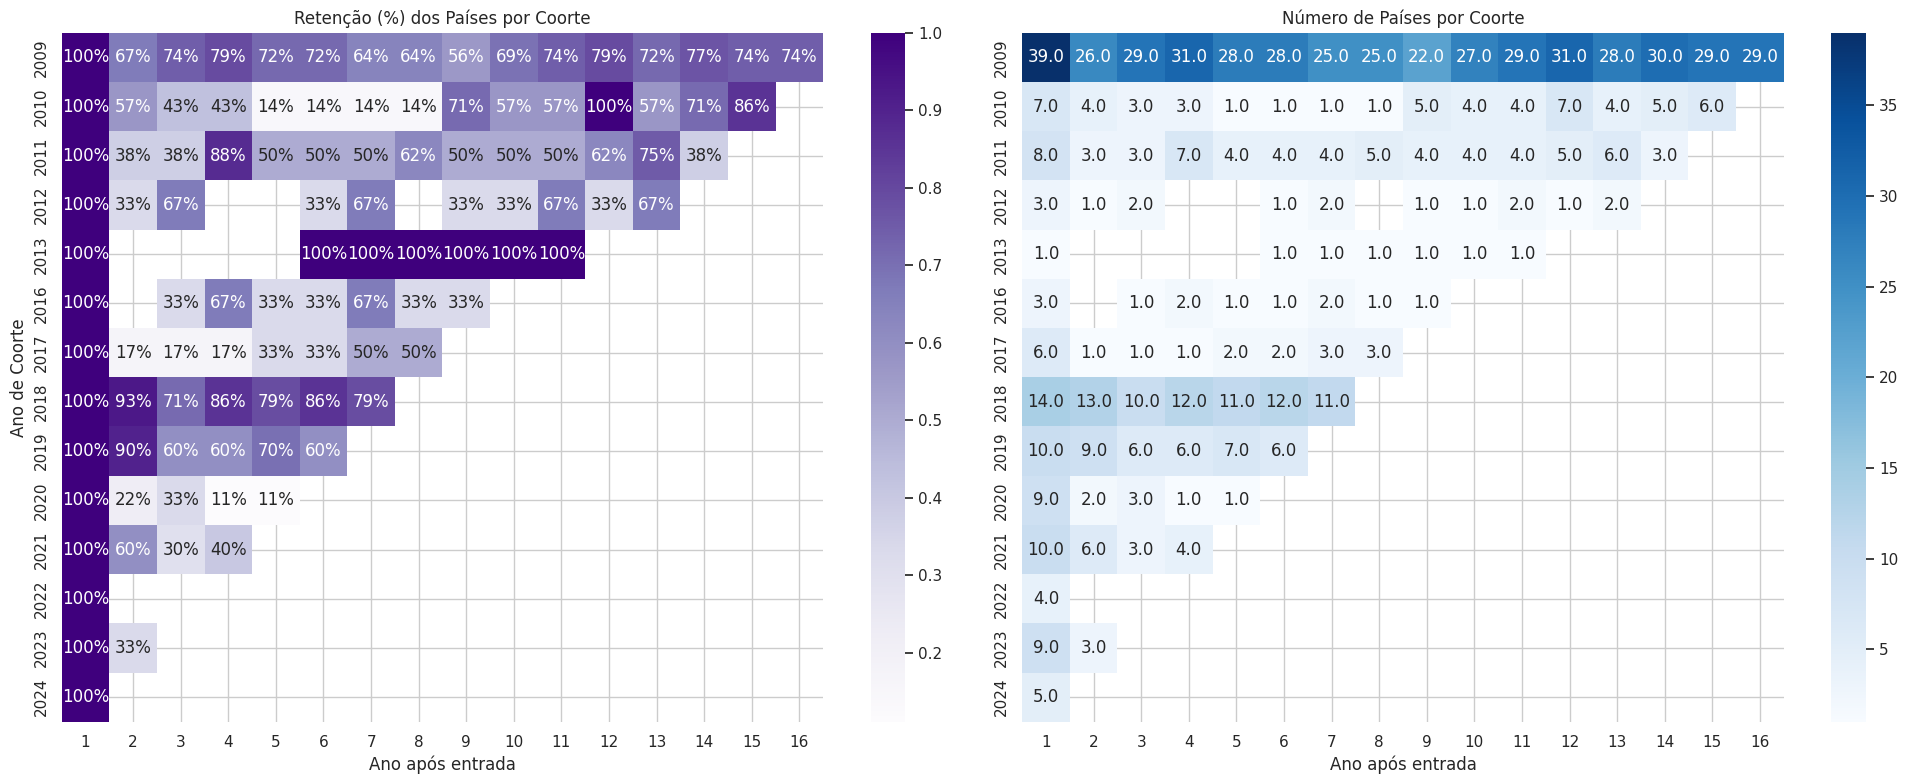

In [ ]:
dfcoorte = dfExportacao

# Descobrindo o ano de entrada de cada país (coorte)
dfcoorte['coorte'] = dfExportacao.groupby('Pais_Destino')['Ano'].transform('min')

# Índice de coorte = quantos anos após o ano de entrada
dfcoorte['coorte_index'] = (dfcoorte['Ano'] - dfcoorte['coorte']) + 1

# Agrupando por coorte e índice de coorte e contando países únicos
cohort_data = dfcoorte.groupby(['coorte', 'coorte_index'])['Pais_Destino'].nunique().reset_index()

# Tabela de coorte
cohort_pivot = cohort_data.pivot(index='coorte', columns='coorte_index', values='Pais_Destino')

# Normalizando para calcular retenção (dividindo pelo valor da 1ª coluna)
retentionPercent = cohort_pivot.divide(cohort_pivot[1], axis=0)

# Plotando heatmaps lado a lado
fig, axs = plt.subplots(1, 2, figsize=(20, 8))  # 1 linha, 2 colunas

# Heatmap de Retenção Percentual
sns.heatmap(retentionPercent, annot=True, fmt=".0%", cmap="Purples", ax=axs[0])
axs[0].set_title('Retenção (%) dos Países por Coorte')
axs[0].set_xlabel('Ano após entrada')
axs[0].set_ylabel('Ano de Coorte')

# Heatmap de Número Absoluto
sns.heatmap(cohort_pivot, annot=True, fmt="", cmap="Blues", ax=axs[1])
axs[1].set_title('Número de Países por Coorte')
axs[1].set_xlabel('Ano após entrada')
axs[1].set_ylabel('')

plt.tight_layout()
plt.show()

In [ ]:
df = dfcoorte[(dfcoorte['coorte'] == 2018) | (dfcoorte['coorte'] == 2019)]
df = df[['Pais_Destino','coorte']]

df.drop_duplicates().reset_index(drop=True)

,Pais_Destino,coorte
0,Antígua e Barbuda,2018
1,"Cayman, Ilhas",2018
2,Chipre,2018
3,Filipinas,2018
4,Gana,2018
5,Grécia,2018
6,Libéria,2018
7,Malásia,2018
8,Malta,2018
9,"Marshall, Ilhas",2018


In [ ]:
dfExportacao.head(5)

,Pais_Destino,Qnt,Valor,Ano,Produto,Pais_Origem,coorte,coorte_index
139,"Alemanha, República Democrática",225086.0,393482.0,2009,Vinho de mesa,Brasil,2009,1
140,Angola,54786.0,84235.0,2009,Vinho de mesa,Brasil,2009,1
143,Antilhas Holandesas,8235.0,10651.0,2009,Vinho de mesa,Brasil,2009,1
145,Argentina,162.0,4523.0,2009,Vinho de mesa,Brasil,2009,1
147,Austrália,1014.0,9195.0,2009,Vinho de mesa,Brasil,2009,1


### Analise RFV

In [ ]:
dfRFV_R = dfExportacao.groupby(['Pais_Destino'])[['Ano']].max().reset_index()
dfRFV_F = dfExportacao.groupby(['Pais_Destino'])[['Ano']].count().reset_index()
dfRFV_v = dfExportacao.groupby(['Pais_Destino'])[['Valor']].mean().reset_index()

#### Analise do Recencia

In [ ]:
# Função para classificar com base nos percentis
def classificar(valor):
    if valor <= 2012:
        return 1
    elif valor <= 2015:
        return 2
    elif valor <= 2018:
        return 3
    elif valor <= 2021:
        return 4
    else:
        return 5

# Aplica a função na coluna
dfRFV_R['Recencia'] = dfRFV_R['Ano'].apply(classificar)


dfRFV_R.sort_values(by = 'Ano', ascending = False,inplace=True)
dfRFV_R.head(15)

,Pais_Destino,Ano,Recencia
1,"Alemanha, República Democrática",2024,5
6,Argélia,2024,5
5,Argentina,2024,5
4,Antígua e Barbuda,2024,5
12,Barbados,2024,5
10,Bahamas,2024,5
9,Austrália,2024,5
8,Arábia Saudita,2024,5
13,Barein,2024,5
26,"Cayman, Ilhas",2024,5


#### Analise do Frequencia

In [ ]:
# Função para classificar com base nos percentis
def classificar(valor):
    if valor <= 3:
        return 1
    elif valor <= 6:
        return 2
    elif valor <= 9:
        return 3
    elif valor <= 12:
        return 4
    else:
        return 5

# Aplica a função na coluna
dfRFV_F['Frequencia'] = dfRFV_F['Ano'].apply(classificar)


dfRFV_F.sort_values(by = 'Ano', ascending = False,inplace=True)
dfRFV_F.head(15)

,Pais_Destino,Ano,Frequencia
1,"Alemanha, República Democrática",16,5
9,Austrália,16,5
28,China,16,5
20,Bélgica,16,5
46,Estados Unidos,16,5
116,"Tcheca, República",16,5
94,Paraguai,16,5
71,Japão,16,5
101,Reino Unido,16,5
43,Emirados Arabes Unidos,15,5


#### Analise do faturamento

<ipython-input-285-5ef8c0331477>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


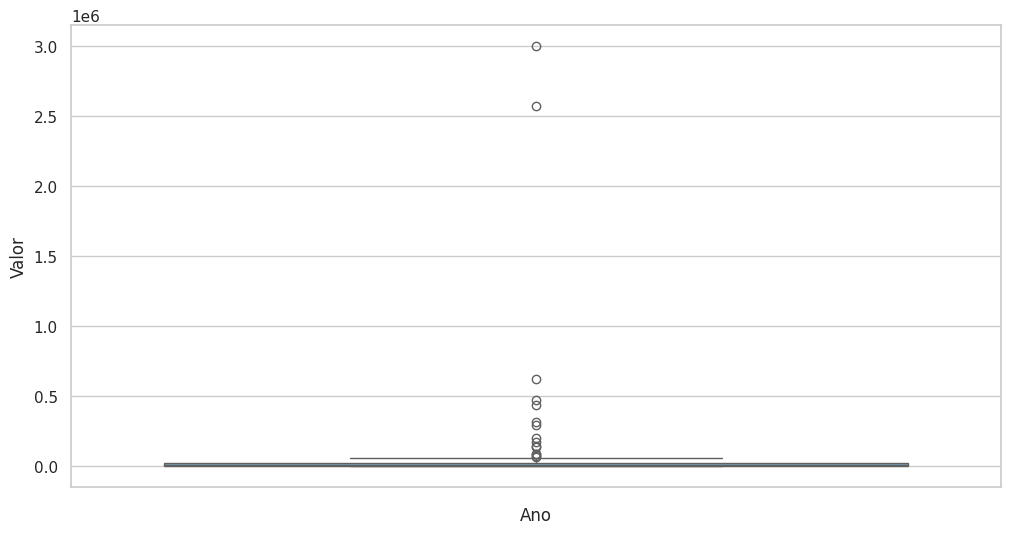

In [ ]:
plt.figure(figsize = (12, 6))
sns.boxplot(
    data = dfRFV_v,
    y='Valor',
    palette='Blues')

plt.xlabel('Ano')
# plt.title('Boxplot por média de faturamento')
plt.show()

In [ ]:
Q1 = dfRFV_v['Valor'].quantile(0.25)
Q3 = dfRFV_v['Valor'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Adiciona coluna indicando se é outlier
dfRFV_v['Outlier'] = (dfRFV_v['Valor'] < limite_inferior) | (dfRFV_v['Valor'] > limite_superior)

dfRFV_v = dfRFV_v.sort_values(by = 'Valor', ascending = False)
dfRFV_v.head(20)

,Pais_Destino,Valor,Outlier
94,Paraguai,2999003.9,True
102,Rússia,2572450.4,True
46,Estados Unidos,622360.9,True
45,Espanha,475993.9,True
61,Haiti,434667.4,True
28,China,317893.1,True
101,Reino Unido,296728.0,True
95,Países Baixos,202381.3,True
122,Uruguai,173647.4,True
71,Japão,145257.4,True


Visto que o valor médio de faturamento apresenta muito outliers. A classificação do faturamento irá ocorrer atras do quintis, porem o valor maximo será o o da finlandia, páis com a maior média, removendo os outliers


In [ ]:
# Suponha que 'valor_compra' seja a coluna com os valores
percentis = dfRFV_v[( dfRFV_v['Outlier'] != True)]
percentis = percentis['Valor'].quantile([0.2, 0.4, 0.6, 0.8])

# Função para classificar com base nos percentis
def classificar(valor):
    if valor <= percentis[0.2]:
        return 1
    elif valor <= percentis[0.4]:
        return 2
    elif valor <= percentis[0.6]:
        return 3
    elif valor <= percentis[0.8]:
        return 4
    else:
        return 5

# Aplica a função na coluna
dfRFV_v['Valor'] = dfRFV_v['Valor'].apply(classificar)

dfRFV_v.head(15)

,Pais_Destino,Valor,Outlier
94,Paraguai,5,True
102,Rússia,5,True
46,Estados Unidos,5,True
45,Espanha,5,True
61,Haiti,5,True
28,China,5,True
101,Reino Unido,5,True
95,Países Baixos,5,True
122,Uruguai,5,True
71,Japão,5,True


#### Analise do RFV

In [ ]:
# Primeiro join: df1 com df2
dfRFV = pd.merge(dfRFV_R, dfRFV_F, on='Pais_Destino', how='inner')

# Segundo join: resultado com df3
dfRFV = pd.merge(dfRFV, dfRFV_v, on='Pais_Destino', how='inner')

dfRFV = dfRFV[['Pais_Destino','Recencia','Frequencia','Valor']]

dfRFV['FV'] = round((dfRFV['Recencia'].astype(int) + dfRFV['Frequencia'].astype(int))/2,0)
dfRFV['Recencia'] = dfRFV['Recencia'].astype(int)

dfRFV_plot = dfRFV.groupby(['Recencia','FV'])['Pais_Destino'].count().reset_index()
dfRFV_plot.sort_values(by = 'Recencia', ascending = False,inplace=True)
dfRFV_plot

,Recencia,FV,Pais_Destino
9,5,5.0,24
8,5,4.0,46
7,5,3.0,34
6,4,4.0,1
4,4,2.0,13
5,4,3.0,1
2,3,2.0,4
3,3,3.0,1
1,2,2.0,1
0,1,1.0,3


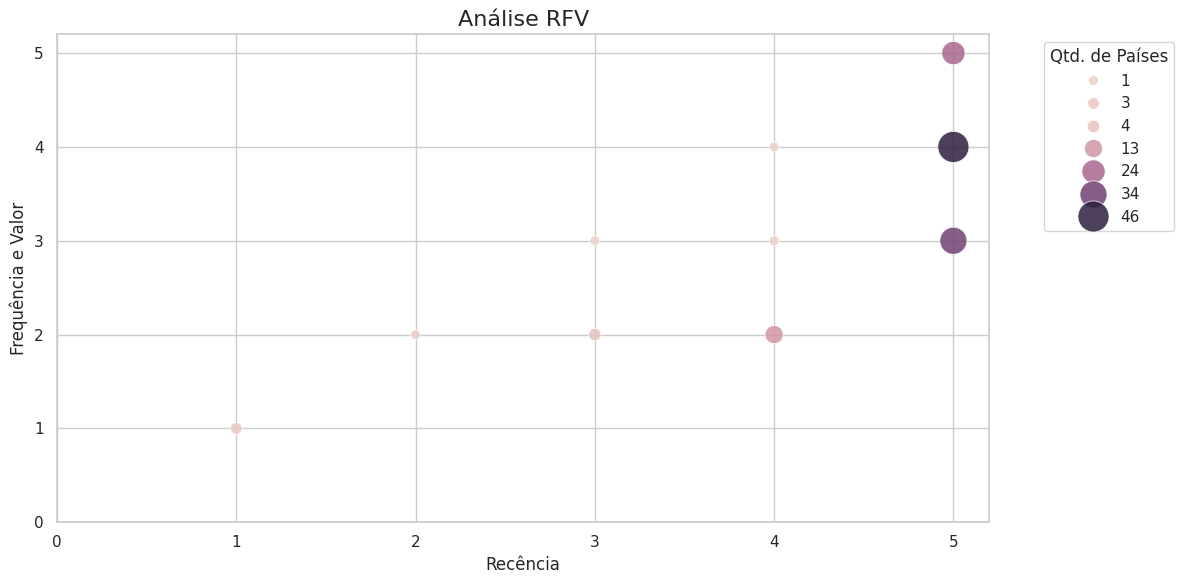

In [ ]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Paleta escura azul-roxo
sns.scatterplot(
    data=dfRFV_plot,
    x='Recencia',
    y='FV',
    size='Pais_Destino',
    hue='Pais_Destino',
    sizes=(50, 500),
    alpha=0.85,
    legend='full'
)

plt.title('Análise RFV', fontsize=16)
plt.xlabel('Recência', fontsize=12)
plt.ylabel('Frequência e Valor', fontsize=12)

# Eixos com inteiros
max_x = int(dfRFV_plot['Recencia'].max())
max_y = int(dfRFV_plot['FV'].max())
plt.xticks(range(0, max_x + 1))
plt.yticks(range(0, max_y + 1))

plt.legend(title='Qtd. de Países', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

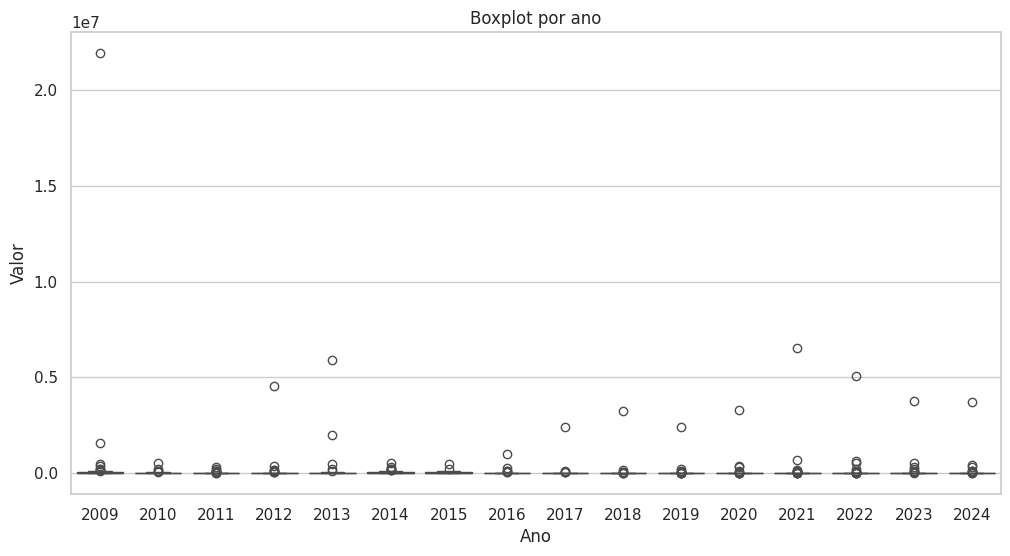

In [ ]:
plt.figure(figsize = (12, 6))
sns.boxplot(data = dfExportacao, x='Ano', y='Qnt')
plt.xlabel('Ano')
plt.ylabel('Valor')
plt.title('Boxplot por ano')
plt.show()

Visto que todos os anos possuem uma **quantidade muito grande de outliers**, iremos realizar o comparativo da mediana, uma vez que os outliers distorcem o valor da média aritmética. Dessa forma, iremos analisar plotar apenas as curvas dos paises que apresentam valores maiores que as medianos dos seus anos.

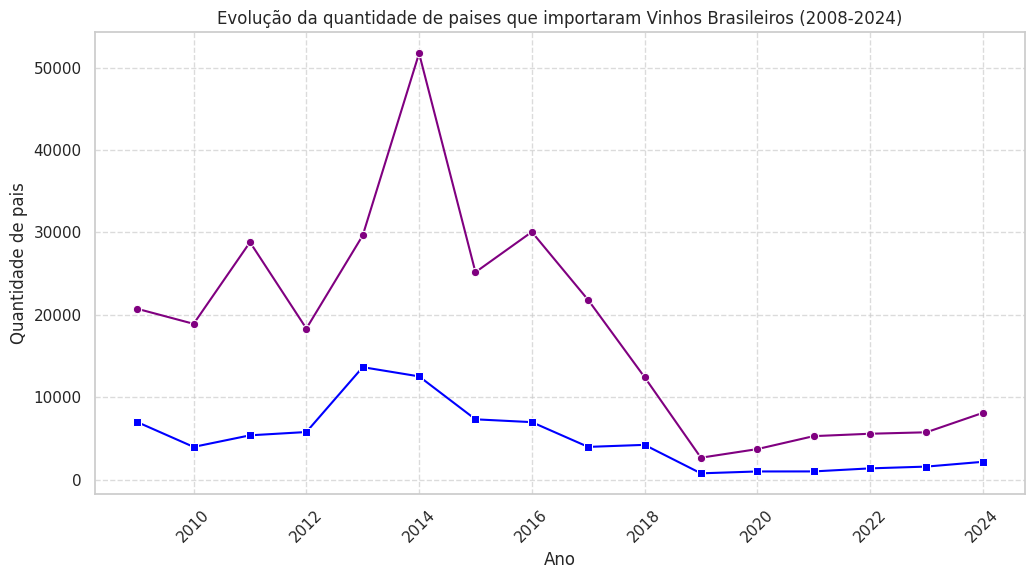

In [ ]:
#Calculo da Mediana por ano
dfExportacaoAnoMediana = dfExportacao.groupby(['Ano'])[['Qnt','Valor']].median().reset_index()
dfExportacaoAnoMediana = dfExportacaoAnoMediana.rename(columns = {'Qnt':'Qnt_Mediana','Valor':'Valor_Mediana'})


# Criando o gráfico
plt.figure(figsize=(12, 6))

sns.lineplot(data=dfExportacaoAnoMediana, x='Ano', y='Valor_Mediana', color='purple', marker='o')
sns.lineplot(data=dfExportacaoAnoMediana, x='Ano', y='Qnt_Mediana', color='Blue', marker='s')


# Tickets
plt.xlabel("Ano")
plt.ylabel("Quantidade de pais")
plt.title("Evolução da quantidade de paises que importaram Vinhos Brasileiros (2008-2024)")
plt.grid(linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Agrupando por ano e pais
dfExportacaoAnoPais = dfExportacao.groupby(['Ano','Pais_Destino'])[['Qnt']].sum().reset_index()

#Pivotando os paises
dfExportacaoAnoPais = dfExportacaoAnoPais.pivot(index='Pais_Destino', columns='Ano', values='Qnt').reset_index()


dfExportacaoAnoPais

Ano,Pais_Destino,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Afeganistão,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN
1,"Alemanha, República Democrática",225086.0,27715.0,36070.0,8189.0,61699.0,213348.0,10680.0,14012.0,15467.0,10794.0,3660.0,6261.0,2698.0,7630.0,4806.0,6666.0
2,Angola,54786.0,33557.0,13889.0,2833.0,1573.0,12182.0,1908.0,7359.0,10170.0,477.0,345.0,NaN,NaN,4068.0,NaN,NaN
3,Antilhas Holandesas,8235.0,9810.0,7335.0,9247.0,11281.0,4455.0,6660.0,16641.0,5400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Antígua e Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0,219.0,624.0,805.0,419.0,383.0,447.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,Vanuatu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN
124,Venezuela,NaN,NaN,NaN,1029.0,NaN,14.0,NaN,NaN,680.0,71.0,NaN,4086.0,26415.0,23220.0,141030.0,122922.0
125,Vietnã,743.0,8820.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,86.0,NaN,130.0,72.0,16.0
126,África do Sul,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,4.0,NaN,NaN,117.0,103.0


In [ ]:
#Agrupando por ano e pais
dfExportacaoAnoPais = dfExportacao.groupby(['Ano','Pais_Destino'])[['Qnt','Valor']].sum().reset_index()

#Removendo a Russia e o Paraguai
dfExportacaoAnoPais = dfExportacaoAnoPais[(dfExportacaoAnoPais['Pais_Destino'] != 'Rússia') & (dfExportacaoAnoPais['Pais_Destino'] != 'Paraguai')]

#Calculo da Mediana por ano
dfExportacaoAnoMediana = dfExportacao.groupby(['Ano'])[['Qnt','Valor']].median().reset_index()
dfExportacaoAnoMediana = dfExportacaoAnoMediana.rename(columns = {'Qnt':'Qnt_Mediana','Valor':'Valor_Mediana'})

#Trazendo a coluna de media para a tabela agrupada
dfExportacaoAnoPais = dfExportacaoAnoPais.merge(dfExportacaoAnoMediana, left_on='Ano', right_on='Ano', how='left')

dfExportacaoAnoPais.head(5)

,Ano,Pais_Destino,Qnt,Valor,Qnt_Mediana,Valor_Mediana
0,2009,"Alemanha, República Democrática",225086.0,393482.0,6982.0,20729.0
1,2009,Angola,54786.0,84235.0,6982.0,20729.0
2,2009,Antilhas Holandesas,8235.0,10651.0,6982.0,20729.0
3,2009,Argentina,162.0,4523.0,6982.0,20729.0
4,2009,Austrália,1014.0,9195.0,6982.0,20729.0


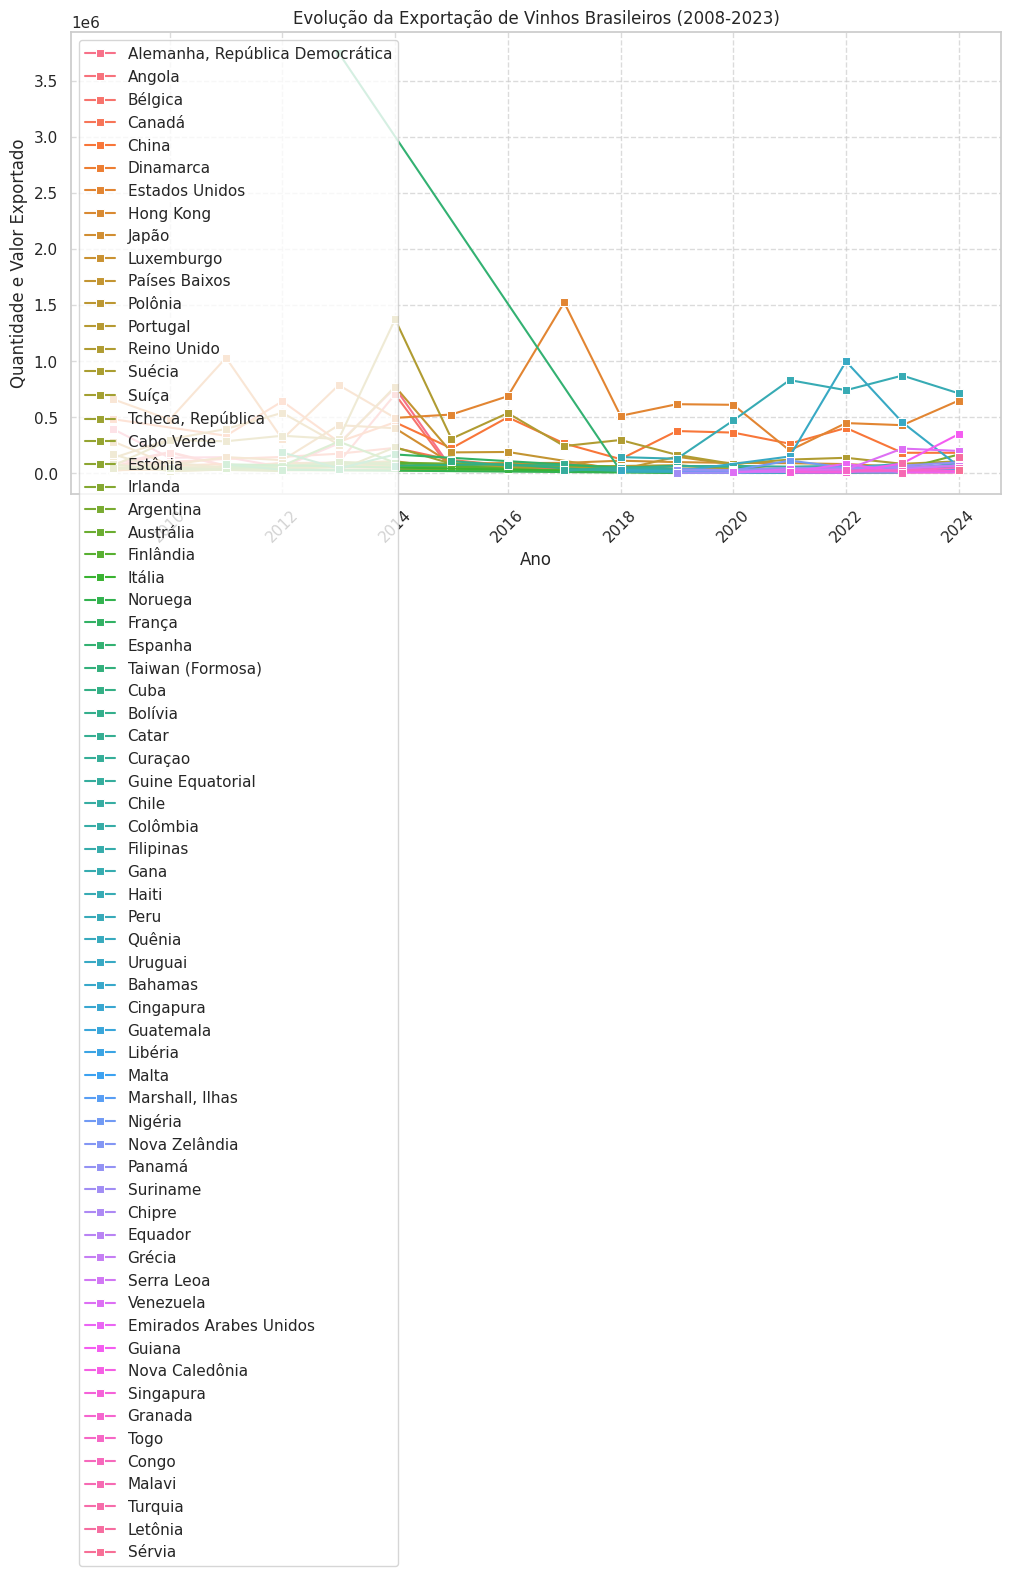

In [ ]:
dfExportacaoAnoPaisValor = dfExportacaoAnoPais[dfExportacaoAnoPais['Valor'] > dfExportacaoAnoPais['Valor_Mediana']]

# Criando o gráfico
plt.figure(figsize=(12, 6))

sns.lineplot(data=dfExportacaoAnoPaisValor, x='Ano', y='Valor', hue='Pais_Destino', marker='s')

# Tickets
plt.xlabel("Ano")
plt.ylabel("Quantidade e Valor Exportado")
plt.title("Evolução da Exportação de Vinhos Brasileiros (2008-2023)")
plt.grid(linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.legend()
plt.show()